# Performance Analysis : Logistic Regression

In [127]:
#first we have to import all relevant Python packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

In [129]:
#reading the datafile
df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")

In [131]:
#showing the top 5 rows
df.head()

,appearance_id,game_id_x,player_id_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000


In [133]:
#showing the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   appearance_id                4199 non-null   object 
 1   game_id_x                    4199 non-null   int64  
 2   player_id_x                  4199 non-null   int64  
 3   competition_id_x             4199 non-null   object 
 4   yellow_cards                 4199 non-null   int64  
 5   red_cards                    4199 non-null   int64  
 6   goals                        4199 non-null   int64  
 7   assists                      4199 non-null   int64  
 8   minutes_played               4199 non-null   int64  
 9   season                       4199 non-null   int64  
 10  round                        4199 non-null   object 
 11  home_club_goals              4199 non-null   int64  
 12  away_club_goals              4199 non-null   int64  
 13  home_club_position

### Feature selection

In [136]:
#(we'll use the specified columns)
selected_columns = ['minutes_played', 'position_y', 'team_captain', 'market_value_in_eur', 'goals']
df_selected = df[selected_columns]

df_selected

,minutes_played,position_y,team_captain,market_value_in_eur,goals
0,70,Defender,0,700000.0,0
1,70,Defender,0,700000.0,0
2,70,Defender,0,700000.0,0
3,70,Defender,0,700000.0,0
4,70,Defender,0,700000.0,0
...,...,...,...,...,...
4194,77,Attack,0,300000.0,1
4195,77,Attack,0,300000.0,1
4196,77,Attack,0,300000.0,1
4197,77,Attack,0,300000.0,1


In [138]:
#valuecounts
df_selected['goals'].value_counts()

goals
0    2594
1    1461
2     102
3      42
Name: count, dtype: int64

In [140]:
#taking 1,2,3 goals as 1 
df_selected['scored_goals']=(df_selected["goals"] > 0).astype(int)
print(df_selected['scored_goals'].value_counts())

scored_goals
0    2594
1    1605
Name: count, dtype: int64


In [142]:
#dropping the goals since we calculated scored goals
df_selected.drop(columns=['goals'],inplace=True)
df_selected

,minutes_played,position_y,team_captain,market_value_in_eur,scored_goals
0,70,Defender,0,700000.0,0
1,70,Defender,0,700000.0,0
2,70,Defender,0,700000.0,0
3,70,Defender,0,700000.0,0
4,70,Defender,0,700000.0,0
...,...,...,...,...,...
4194,77,Attack,0,300000.0,1
4195,77,Attack,0,300000.0,1
4196,77,Attack,0,300000.0,1
4197,77,Attack,0,300000.0,1


### Label Encoding

In [145]:
#Label Encoding
label = preprocessing.LabelEncoder()
df_selected['position_y_enc']=label.fit_transform(df_selected['position_y'])
df_selected['position_y_enc'].unique()

array([1, 2, 0])

In [149]:
#dropping position_x cause the column is label encoded to position_x_enc
df_selected.drop(columns=["position_y"],inplace=True)
df_selected

,minutes_played,team_captain,market_value_in_eur,scored_goals,position_y_enc
0,70,0,700000.0,0,1
1,70,0,700000.0,0,1
2,70,0,700000.0,0,1
3,70,0,700000.0,0,1
4,70,0,700000.0,0,1
...,...,...,...,...,...
4194,77,0,300000.0,1,0
4195,77,0,300000.0,1,0
4196,77,0,300000.0,1,0
4197,77,0,300000.0,1,0


### Outlier treatment by Winsorization

In [151]:
#taking minutes played and market value in eur columns
winsorization_df=pd.DataFrame(df_selected[['minutes_played','market_value_in_eur']])
df_selected=pd.DataFrame(df_selected.drop(['minutes_played','market_value_in_eur'],axis=1))

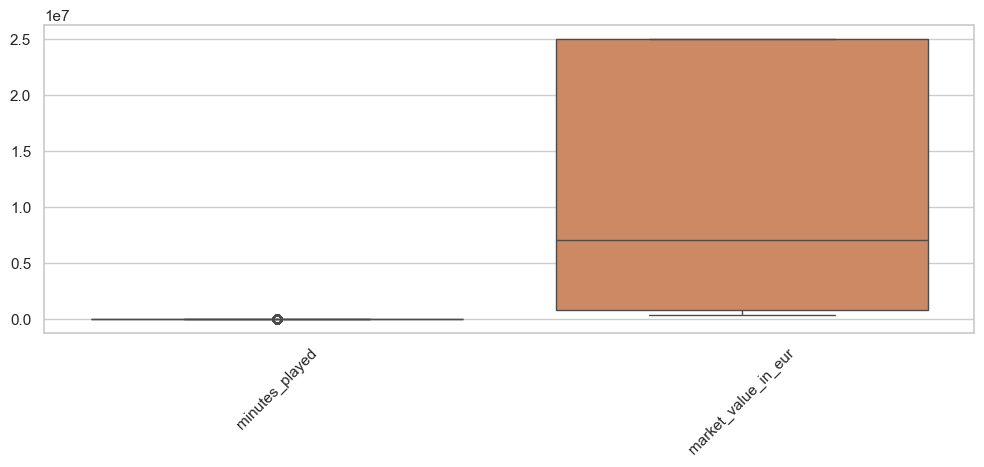

In [153]:
#checking outliers by boxplot
sns.boxplot(data=winsorization_df)
plt.gcf().set_size_inches(12,4)
plt.xticks(rotation=45)
plt.show()

In [155]:
#treating the outlier
def iqr_winsorization(df, thresh=1.5):
    df_out = df.copy()  # Create a copy to avoid modifying original data
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        # Calculate IQR
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_out.loc[df_out[col] < lower_fence, col] = lower_fence
        df_out.loc[df_out[col] > upper_fence, col] = upper_fence

    return df_out

df = pd.DataFrame(winsorization_df)
# Perform outlier treatment on all columns
selected_treated_df = iqr_winsorization(df.copy())
print(selected_treated_df)

      minutes_played  market_value_in_eur
0               70.0             700000.0
1               70.0             700000.0
2               70.0             700000.0
3               70.0             700000.0
4               70.0             700000.0
...              ...                  ...
4194            77.0             300000.0
4195            77.0             300000.0
4196            77.0             300000.0
4197            77.0             300000.0
4198            77.0             300000.0

[4199 rows x 2 columns]


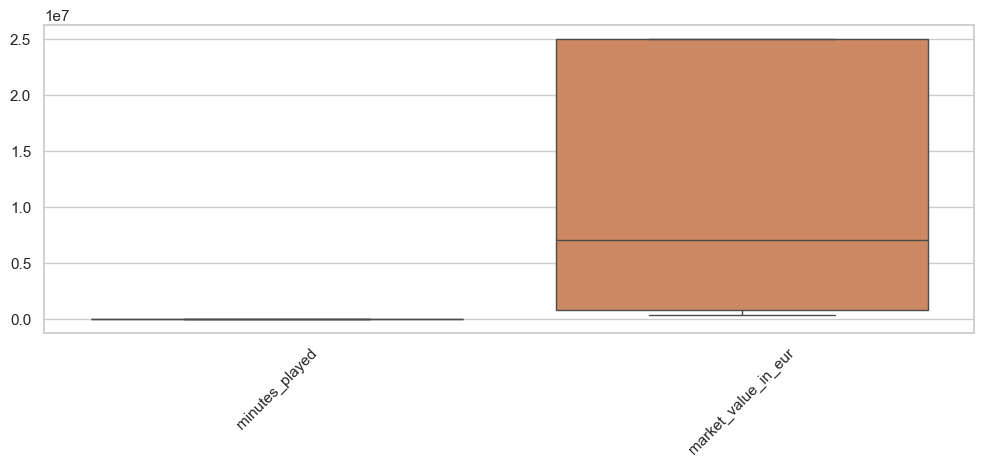

In [157]:
#boxplot after outlier treatment
sns.boxplot(data=selected_treated_df)
plt.gcf().set_size_inches(12,4)
plt.xticks(rotation=45)
plt.show()

## Scaling

In [159]:
#scaling the columns to fixed range
col = selected_treated_df.columns
scaler=StandardScaler()
selected_treated_df=scaler.fit_transform(selected_treated_df)
selected_df_scaled = pd.DataFrame(selected_treated_df,columns=col)
selected_df_scaled

,minutes_played,market_value_in_eur
0,0.004798,-0.977711
1,0.004798,-0.977711
2,0.004798,-0.977711
3,0.004798,-0.977711
4,0.004798,-0.977711
...,...,...
4194,0.319208,-1.014459
4195,0.319208,-1.014459
4196,0.319208,-1.014459
4197,0.319208,-1.014459


In [161]:
#Preserving Outlier Information: StandardScaler centers the data around the mean and scales it to unit variance. This method preserves the relative distances between data points and outliers, which can be crucial for certain machine learning algorithms. MinMaxScaler, on the other hand, compresses the data into a fixed range (typically between 0 and 1), which can potentially diminish the impact of outliers.

## Concatinating Categorical and numerical data

In [164]:
#Concating the two, will replace the same columns
selected_df_scaled = pd.concat([selected_df_scaled,df_selected],axis=1)
selected_df_scaled

,minutes_played,market_value_in_eur,team_captain,scored_goals,position_y_enc
0,0.004798,-0.977711,0,0,1
1,0.004798,-0.977711,0,0,1
2,0.004798,-0.977711,0,0,1
3,0.004798,-0.977711,0,0,1
4,0.004798,-0.977711,0,0,1
...,...,...,...,...,...
4194,0.319208,-1.014459,0,1,0
4195,0.319208,-1.014459,0,1,0
4196,0.319208,-1.014459,0,1,0
4197,0.319208,-1.014459,0,1,0


## Multicolinearity

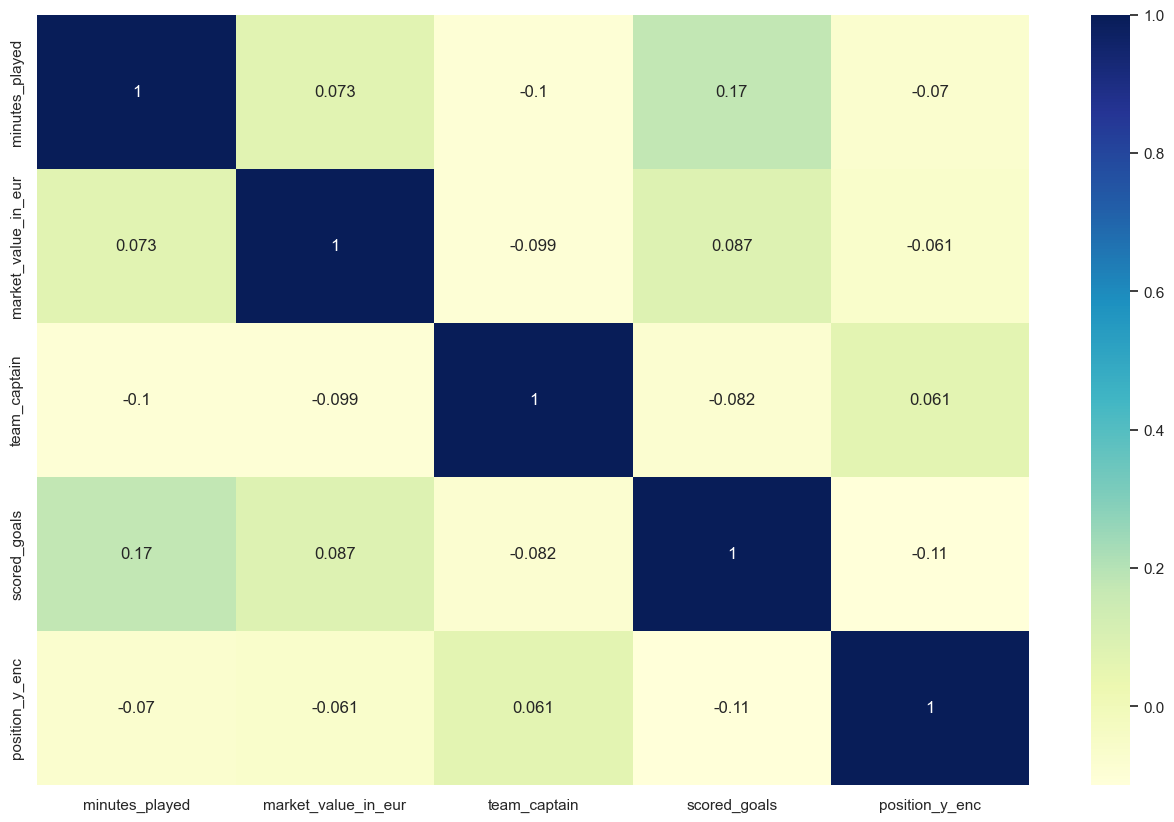

In [166]:
#Multicolinearity
fig,ax = plt.subplots(1,1,figsize=(16,10))
ax= sns.heatmap(selected_df_scaled.corr(),annot=True,cmap="YlGnBu")

### Interpretation: Position_x_enc and Market Value: There's a moderate positive correlation (0.31) between the encoded position and market value. This suggests that players in certain positions (likely attacking positions) tend to have higher market values. 
### Negative Correlations: Position_x_enc and Scored Goals: There's a weak negative correlation (-0.14) between the encoded position and goals scored. This might indicate that players in certain defensive positions, which are often encoded with low

### Deriving the target variable(y) and independent variables(x)

In [168]:
x = selected_df_scaled.drop(columns='scored_goals',axis=1) #dropping scored goals from independent variables as it is target variable
y = selected_df_scaled['scored_goals']

### Data splitting

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # 20% of the data will be used for the test set, and the remaining 80% will be used for the training set.
x_train.shape,x_test.shape,y_train.shape,y_test.shape #(3359 samples, 4 features),(840 samples)

((3359, 4), (840, 4), (3359,), (840,))

### Logistic Regression

In [175]:
#Logistic Regressionn Training model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
#x_train: This is the feature matrix containing the independent variables for the training set.
#y_train: This is the target variable vector containing the dependent variable values for the training set.
# Using the trained model to predict the outcome of the X_Test dataset
y_pred = logreg.predict(x_test)
# This line uses the trained model (logreg) to predict the target variable for the unseen test data (x_test). The output, y_pred, is a vector containing the predicted target variable values for each sample in the test set.

In [179]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)

[[498  23]
 [239  80]]
498 23 239 80


In [183]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(y_test,y_pred))#Combining the True positive and true negative cases
#i.e records
print('recall:', recall_score(y_test,y_pred)) #Prediction got True negative cases
print('f1-score:', f1_score(y_test,y_pred)) #Prediction for True positive cases
print('precision:', precision_score(y_test,y_pred))# Prediction fot True positive cases

accuracy: 0.6880952380952381
recall: 0.2507836990595611
f1-score: 0.3791469194312796
precision: 0.7766990291262136


In [45]:
# ROC Receiver Operating Characteristic Score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
roc

0.6317257883554941

#### The model exhibits moderate accuracy (0.6881), indicating it correctly classifies a reasonable proportion of instances. Recall is relatively low (0.2508), suggesting the model struggles to identify a significant portion of the positive class. Precision is high (0.7767), indicating that when the model predicts a positive class, it is often correct. The F1-score (0.3791) balances precision and recall, providing an overall measure of model performance. The ROC-AUC score (0.6317) suggests moderate discriminative power, indicating the model's ability to distinguish between positive and negative classes.

<Figure size 1000x800 with 0 Axes>

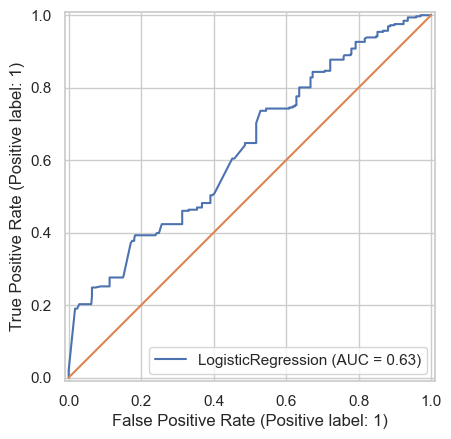

In [47]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,8))
#plot_roc_curve(logreg,X_test,Y_test, color='orange')
RocCurveDisplay.from_estimator(logreg, x_test, y_test)
plt.plot([0,1],[0,1])
plt.show()

### Interpretation:The ROC curve visualizes the trade-off between true positive rate (sensitivity) and false positive rate (specificity) for different classification thresholds. The AUC (Area Under the Curve) of 0.63 indicates moderate discriminative power. A higher AUC closer to 1 signifies better model performance in distinguishing between positive and negative classes.

# Player profile and Market value : Visualizations 

### 1.Calculate the average market value by position.

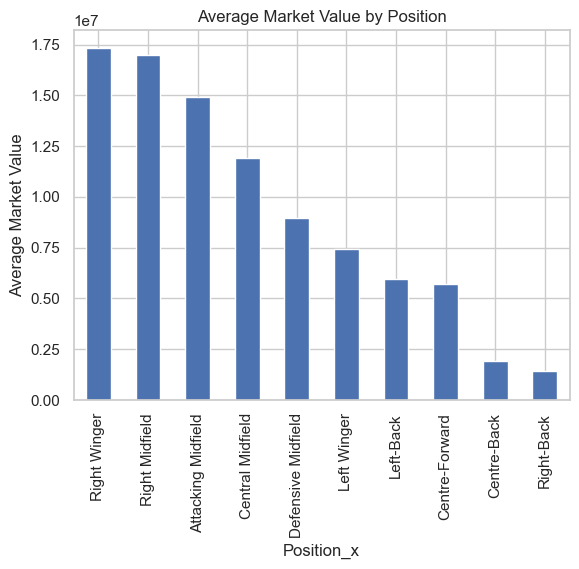

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")
# Group the data by position and calculate the average market value
grouped_data = df.groupby('position_x')['market_value_in_eur'].mean().sort_values(ascending=False)

# Visualize the results
grouped_data.plot(kind='bar')
plt.xlabel('Position_x')
plt.ylabel('Average Market Value')
plt.title('Average Market Value by Position')
plt.show()

#### Interpretation: Right winger position has the highest average market value.

 ### 2: What are the key factors influencing a player's market value?

                        goals   assists  minutes_played  market_value_in_eur
goals                1.000000  0.089989        0.194889             0.091787
assists              0.089989  1.000000        0.086878             0.173245
minutes_played       0.194889  0.086878        1.000000             0.077168
market_value_in_eur  0.091787  0.173245        0.077168             1.000000


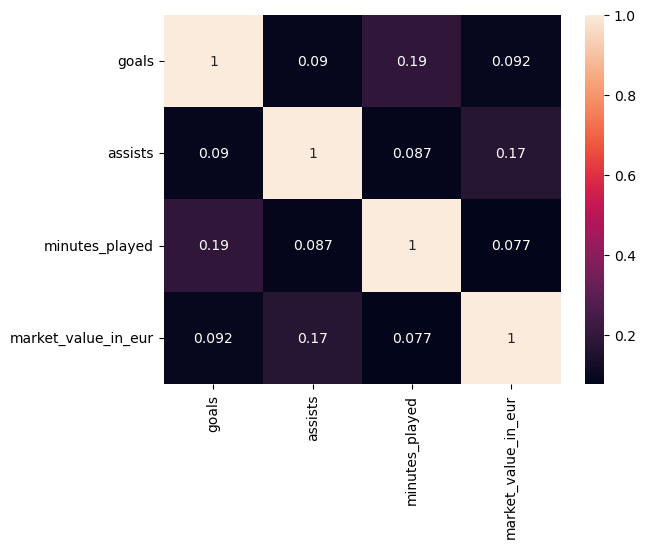

In [49]:
# Calculate correlations
import seaborn as sns
corr_matrix = df[['goals', 'assists', 'minutes_played', 'market_value_in_eur']].corr()
print(corr_matrix)

# Visualize correlations
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### Goals and Assists: There's a moderate positive correlation (0.09) between goals and assists. This suggests that players who score more goals tend to also make more assists, and vice versa.
##### Goals and Minutes Played: There's a strong positive correlation (0.19) between goals and minutes played. This indicates that players who play more minutes have a higher chance of scoring goals.
##### Assists and Minutes Played: There's a moderate positive correlation (0.087) between assists and minutes played. This suggests that players who play more minutes have a higher chance of making assists.
##### Market Value and Goals/Assists: There's a weak positive correlation between market value and goals (0.092) and assists (0.17). This suggests that while goals and assists can contribute to a player's market value, they are not the only factors. Other factors like experience, age, and team performance also play a role.
##### Market Value and Minutes Played: There's a very weak positive correlation (0.077) between market value and minutes played. This suggests that while playing more minutes can contribute to a player's market value, it's not the only factor.

### 3.How does a player's performance in different leagues impact their market value?



player_name_y
Giovanni Reyna       2.500000e+07
Christian Pulisic    2.500000e+07
Weston McKennie      2.000000e+07
Tyler Adams          2.000000e+07
Timothy Weah         1.400000e+07
Josh Sargent         1.200000e+07
Desevio Payne        1.134207e+07
Sergino Dest         1.000000e+07
Jordan               7.000000e+06
Luca de la Torre     3.000000e+06
Name: market_value_in_eur, dtype: float64


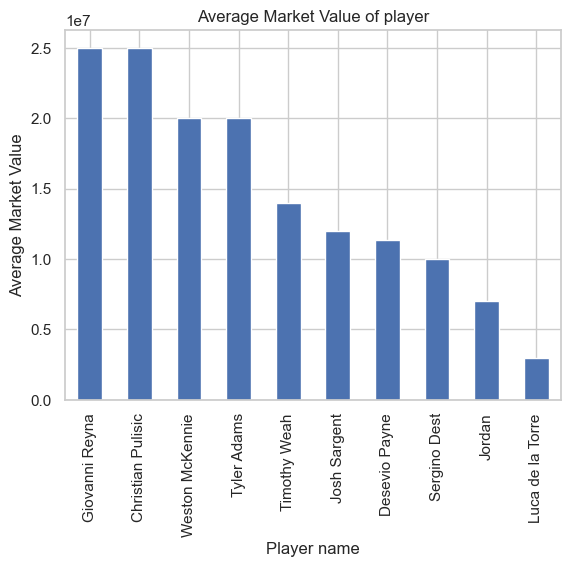

In [197]:
# Business Question 2: League Impact on Market Value
# Group by league and calculate average market value
df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")
league_avg_value = df.groupby('player_name_y')['market_value_in_eur'].mean().sort_values(ascending=False).nlargest(10)
print(league_avg_value)

# Visualize league-wise average market value
league_avg_value.plot(kind='bar')
plt.xlabel('Player name')
plt.ylabel('Average Market Value')
plt.title('Average Market Value of player')
plt.show()

#### Interpretation: Giovanni Reyna has the highest market value 

#### 4. Track changes in market value over time to identify trends and potential investment opportunities.

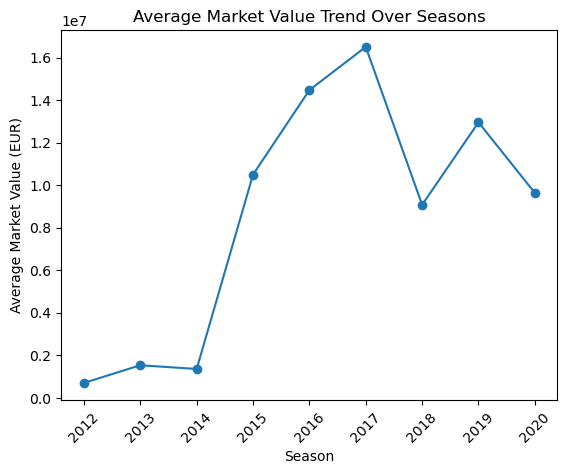

In [52]:
df['season'] = df['season'].astype(str)  # Ensure season is string for grouping
market_value_trend = df.groupby('season')['market_value_in_eur'].mean()

market_value_trend.plot(kind='line', marker='o')
plt.title('Average Market Value Trend Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=45)
plt.show()

#### Interpretaion: 2017 has the highest average market value.